# Wine_ing

## OVERVIEW

__Jorge Segura__

__Kyle Brattin__


Quality is a crucial step for both processes and is currently largely dependent on wine tasting by experts. This work aims at the prediction of wine preferences from objective analytical tests. We'll do that by determining drivers of wine and build a model to be able to accuractely predict a wine's rating based on the finding we model.

## Imports

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

#tabular data imports :
import pandas as pd
import numpy as np
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
# Custom palette with specified colors
custom_palette = sns.color_palette(["#33B8C6", "#C64133", "#4682B4"])
# Using a matplotlib colormap
custom_palette2 = sns.color_palette(["#33B8C6","#50C2CE","#6DCCD6","#8AD6DE","#A7E0E6","#C4EAEE","#E1F4F6"])

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

#stats
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import explore as e
import model as m
import os
directory = os.getcwd()
pd.set_option('display.max_columns', None)

# URLs for the datasets
red_wine_url = 'https://query.data.world/s/qgc7p446ulzlgtja2626fwkzcm6ttf?dws=00000'
white_wine_url = 'https://query.data.world/s/f5oqq5ltnxcdnoh7uykzubtxnnspne?dws=00000'

In [2]:
df = w.load_and_prepare_wine_data(red_wine_url, white_wine_url)
df.head(3)

fixed acidity     volatile acidity          citric acid  \
wine_id                                                                  
w-1                     7.00                 0.27                 0.36   
w-2                     6.30                 0.30                 0.34   
w-3                     8.10                 0.28                 0.40   

              residual sugar            chlorides  free sulfur dioxide  \
wine_id                                                                  
w-1                    20.70                 0.04                45.00   
w-2                     1.60                 0.05                14.00   
w-3                     6.90                 0.05                30.00   

         total sulfur dioxide              density                   pH  \
wine_id                                                                   
w-1                    170.00                 1.00                 3.00   
w-2                    132.00                 0.99                 3.30   
w-3                     97.00                 1.00                 3.26   

                   sulphates              alcohol  quality  color  
wine_id                                                            
w-1                     0.45                 8.80        6  white  
w-2                     0.49                 9.50        6  white  
w-3                     0.44                10.10        6  white

## Acquire

- Data acquired from the urls in the import section, the databases were gathered during the Tobias cohort.

- Size of data ((6497 rows, 13 columns)

- Each row represents a wine sample

- Each column represents a feature for the wine sample

In [3]:
e.summarize(df)

--------------------------------
--------------------------------
Information on DataFrame: 
Shape of Dataframe: (6497, 13)
--------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, w-1 to r-1599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 

## Prepare

* Clean up data

* Did not drop any nulls (there weren't any)

* No imputations performed (nothing to impute)

* Created is_white for if a wine is red (0) or white (1)

* Renamed columns to promote readability

* Checked that column data types were appropriate

* Split data into train(60), validate(20) and test(20) (stratifying on quality)

* Scale continuous variable

In [4]:
df = w.prepare_wine(red_wine_url, white_wine_url, filename='wines.csv')
df.head()

fixed_acidity     volatile_acidity          citric_acid  \
wine_id                                                                  
w-1                     7.00                 0.27                 0.36   
w-2                     6.30                 0.30                 0.34   
w-3                     8.10                 0.28                 0.40   
w-4                     7.20                 0.23                 0.32   
w-5                     7.20                 0.23                 0.32   

              residual_sugar            chlorides  free_sulfur_dioxide  \
wine_id                                                                  
w-1                    20.70                 0.04                45.00   
w-2                     1.60                 0.05                14.00   
w-3                     6.90                 0.05                30.00   
w-4                     8.50                 0.06                47.00   
w-5                     8.50                 0.06                47.00   

         total_sulfur_dioxide              density                   pH  \
wine_id                                                                   
w-1                    170.00                 1.00                 3.00   
w-2                    132.00                 0.99                 3.30   
w-3                     97.00                 1.00                 3.26   
w-4                    186.00                 1.00                 3.19   
w-5                    186.00                 1.00                 3.19   

                   sulphates              alcohol  quality  color  
wine_id                                                            
w-1                     0.45                 8.80        6  white  
w-2                     0.49                 9.50        6  white  
w-3                     0.44                10.10        6  white  
w-4                     0.40                 9.90        6  white  
w-5                     0.40                 9.90        6  white

In [5]:
train_prep, validate_prep, test_prep = e.preprocess_wine(df)
train_prep.head(3)


    train -> (3898, 13)
    validate -> (1299, 13)
    test -> (1300, 13)


fixed_acidity     volatile_acidity          citric_acid  \
wine_id                                                                  
w-2549                  0.17                 0.14                 0.42   
w-4295                  0.26                 0.11                 0.28   
r-956                   0.36                 0.10                 0.52   

              residual_sugar            chlorides  free_sulfur_dioxide  \
wine_id                                                                  
w-2549                  0.10                 0.06                 0.42   
w-4295                  0.13                 0.06                 0.14   
r-956                   0.02                 0.13                 0.05   

         total_sulfur_dioxide              density                   pH  \
wine_id                                                                   
w-2549                   0.56                 0.16                 0.36   
w-4295                   0.32                 0.15                 0.28   
r-956                    0.05                 0.18                 0.49   

                   sulphates              alcohol              quality  \
wine_id                                                                  
w-2549                  0.17                 0.22                 0.50   
w-4295                  0.18                 0.41                 0.33   
r-956                   0.25                 0.35                 0.33   

                       white  
wine_id                       
w-2549                  1.00  
w-4295                  1.00  
r-956                   0.00

## Explore

Our Plan here is to figure out by the information given what type of stats testing we wll be doing on our dataset.

We will also be deciding if we want to do Bivariate or Univariate exploration on our data. 


### Q1. What is the distribution of each variable?
Since we are doing at univariate exploration, I can use the original dataset

### Q2. Does the pH differ across density?


### We are also creating a plethera of visuals to give us some more possible insight to our data

more white wines have a lower pH thatn red wines
average wine have various levels of pH and density

Spearman R

Ho: there is no linear correlation between volatile_acidity and alcohol
Ha: there is linear correlation between volatile_acidity and alcohol
there is no linear correlation between volatile_acidity and alcohol
no strong correlation

white wines have a lower volatile_acidity than the red wines
average wines have average to lower alcohol levels
higer quality wines usually have higher alcohol and somewhat low volitile acidity
most red wines have medium to high volatile acidity



- Ho: there is no linear correlation between volatile_acidity and free_sulfur_dioxide
- Ha: there is linear correlation between volatile_acidity and free_sulfur_dioxide

white wines are usually low chlorides and low sulphates
many red wines have higher chlorides and sulphates
the majority of high quality wines have low chlorides


Ho: there is no linear correlation between citric_acid and total_sulfur_dioxide
Ha: there is linear correlation between citric_acid and total_sulfur_dioxide
there is no linear correlation between citric_acid and total_sulfur_dioxide
however, there does appear to be some kind of non-linear relationship (very low)




Ho: there is no linear correlation between alcohol and sulphates
Ha: there is linear correlation between alcohol and sulphates

there is no linear correlation between alcohol and sulphates
no correlation


In [6]:
cols = df.columns

### Q1. What is the distribution of each variable?
#### Since I'm doing at univariate exploration, I can use the original dataset.

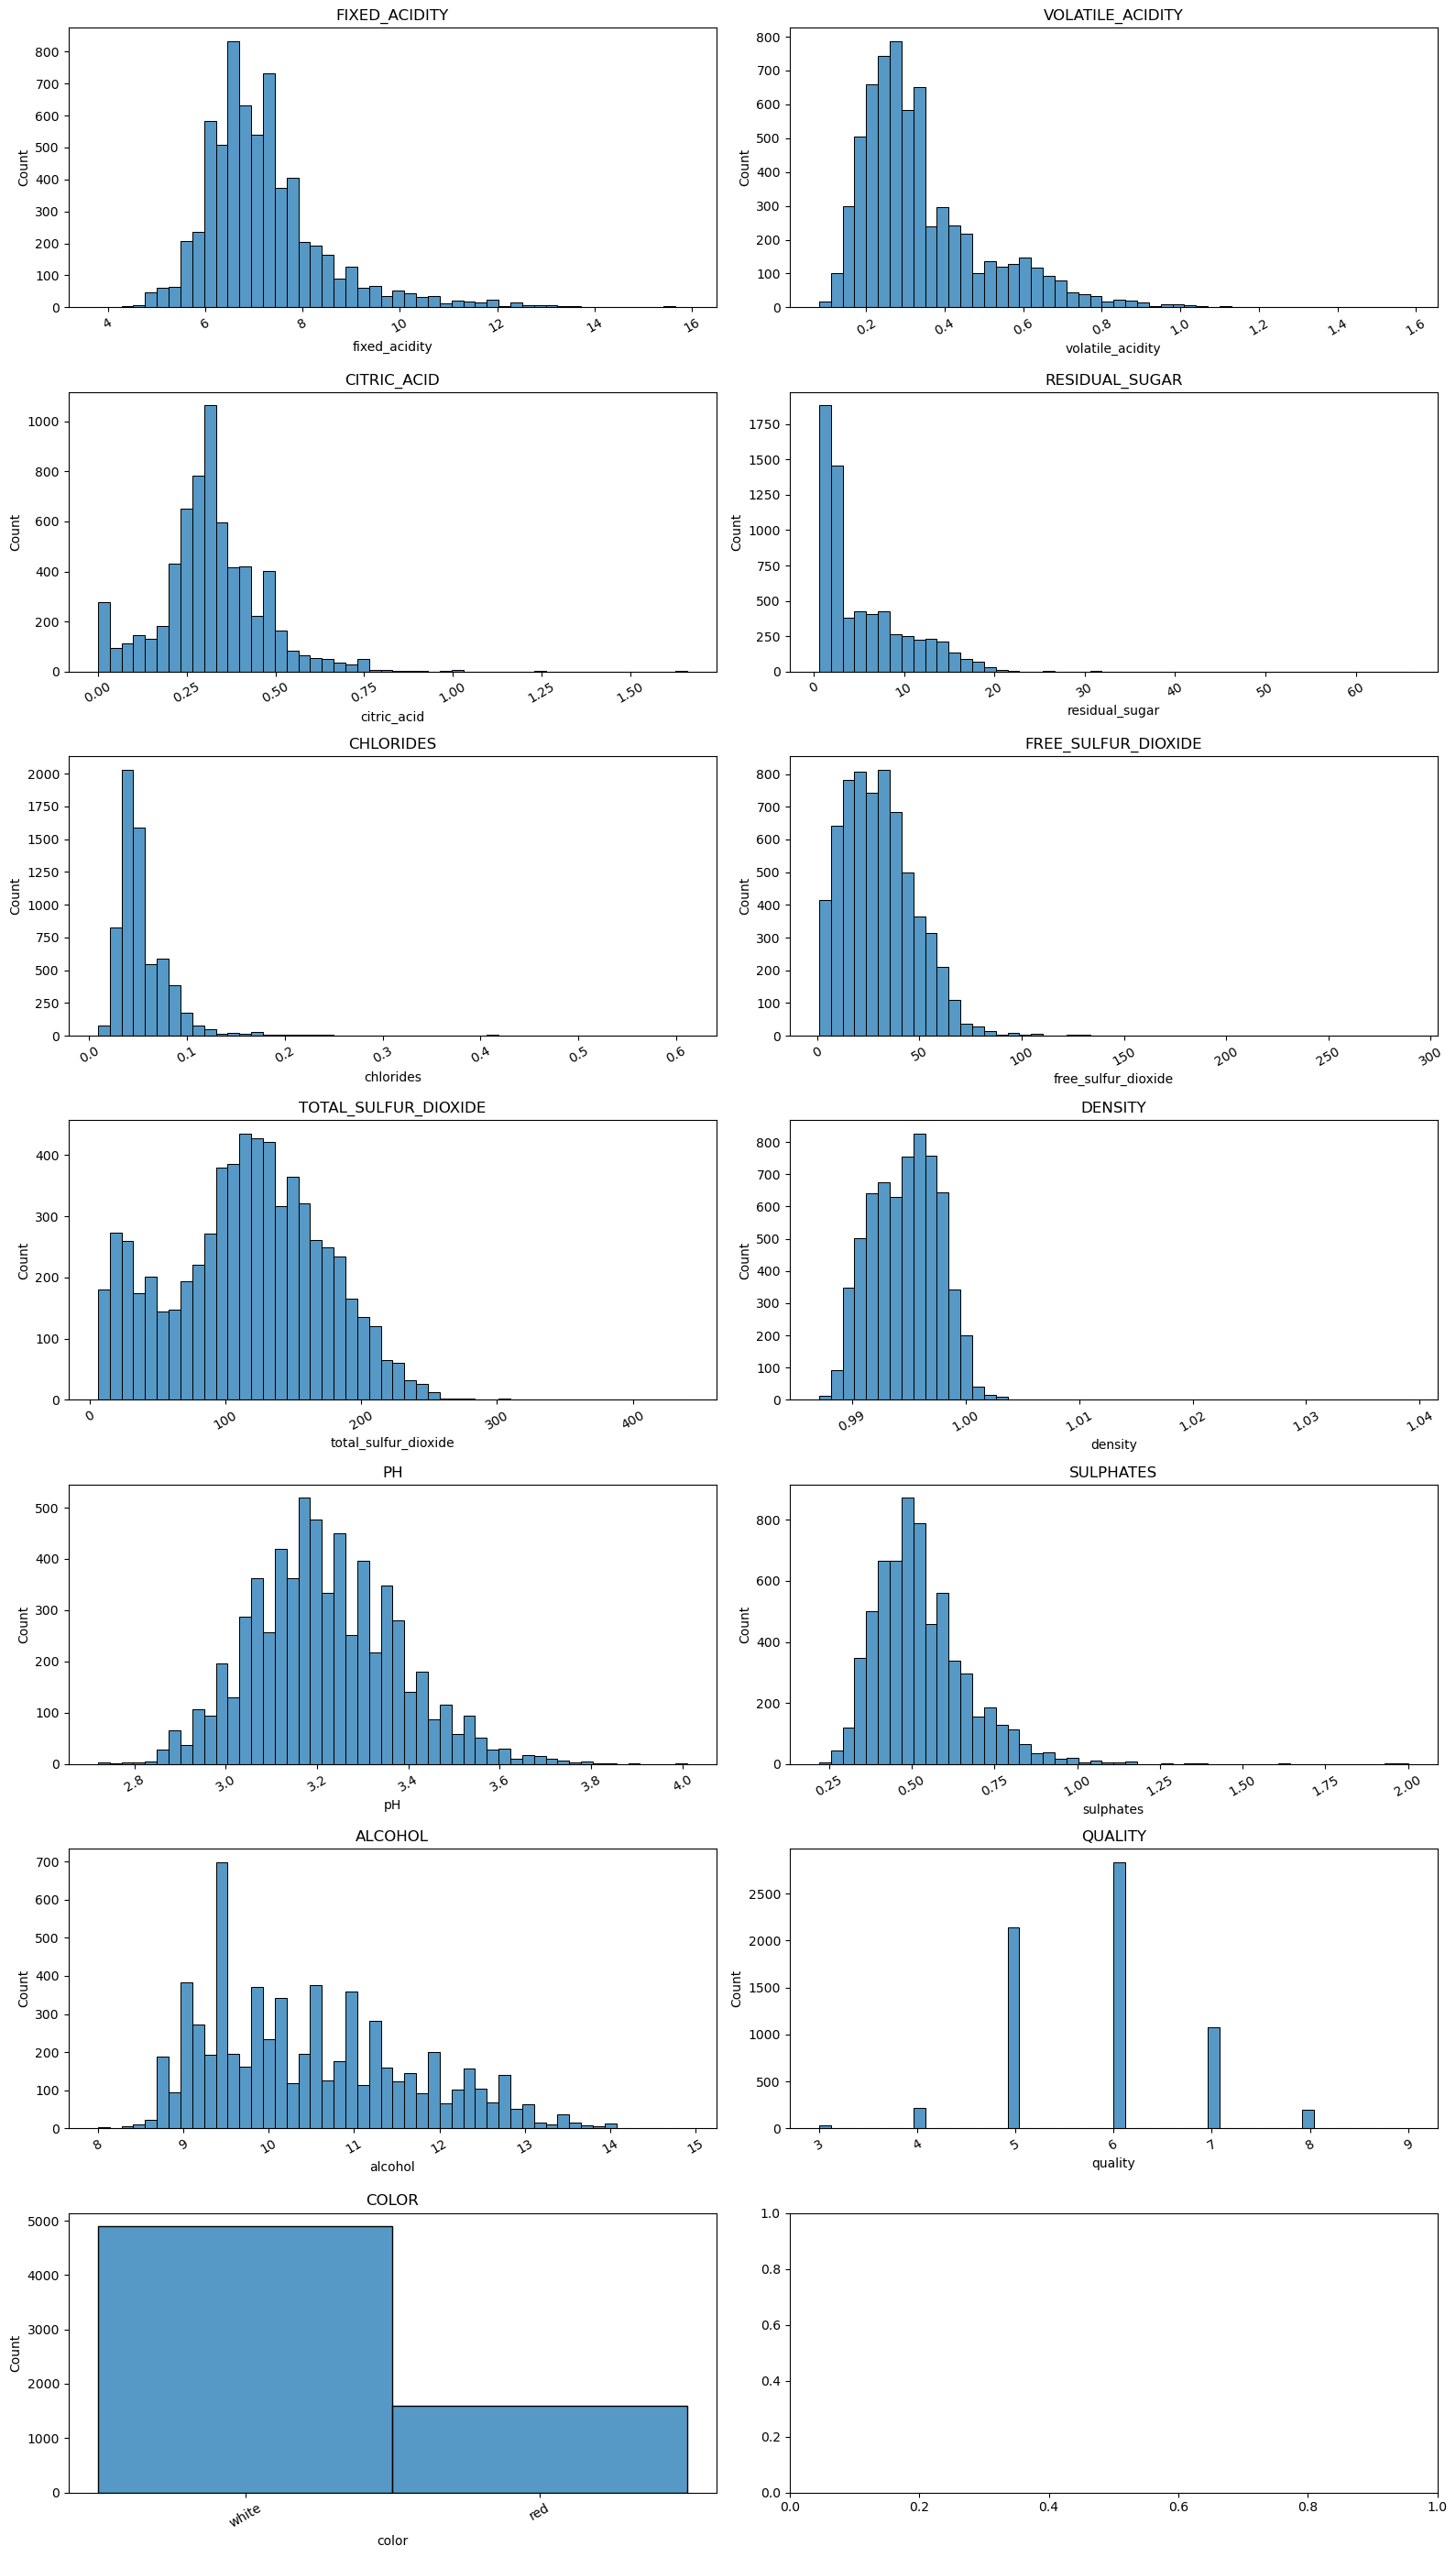

In [7]:
# Determine the number of rows needed for subplots
n_rows = len(cols) // 2 + len(cols) % 2
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*4))

for i, col in enumerate(cols):
    ax = axes.flatten()[i]
    sns.histplot(df[col], bins=50, ax=ax)  # Using seaborn for a more refined look
    ax.set_title(col.upper(), fontsize=12)  # Set title for each subplot
    ax.tick_params(axis='x', rotation=30)   # Rotate x-axis labels
    ax.grid(False)  # Hide gridlines

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [8]:
# comparing the numbers of wine
pd.crosstab(df.color, df.quality)

quality   3    4     5     6    7    8  9
color                                    
red      10   53   681   638  199   18  0
white    20  163  1457  2198  880  175  5

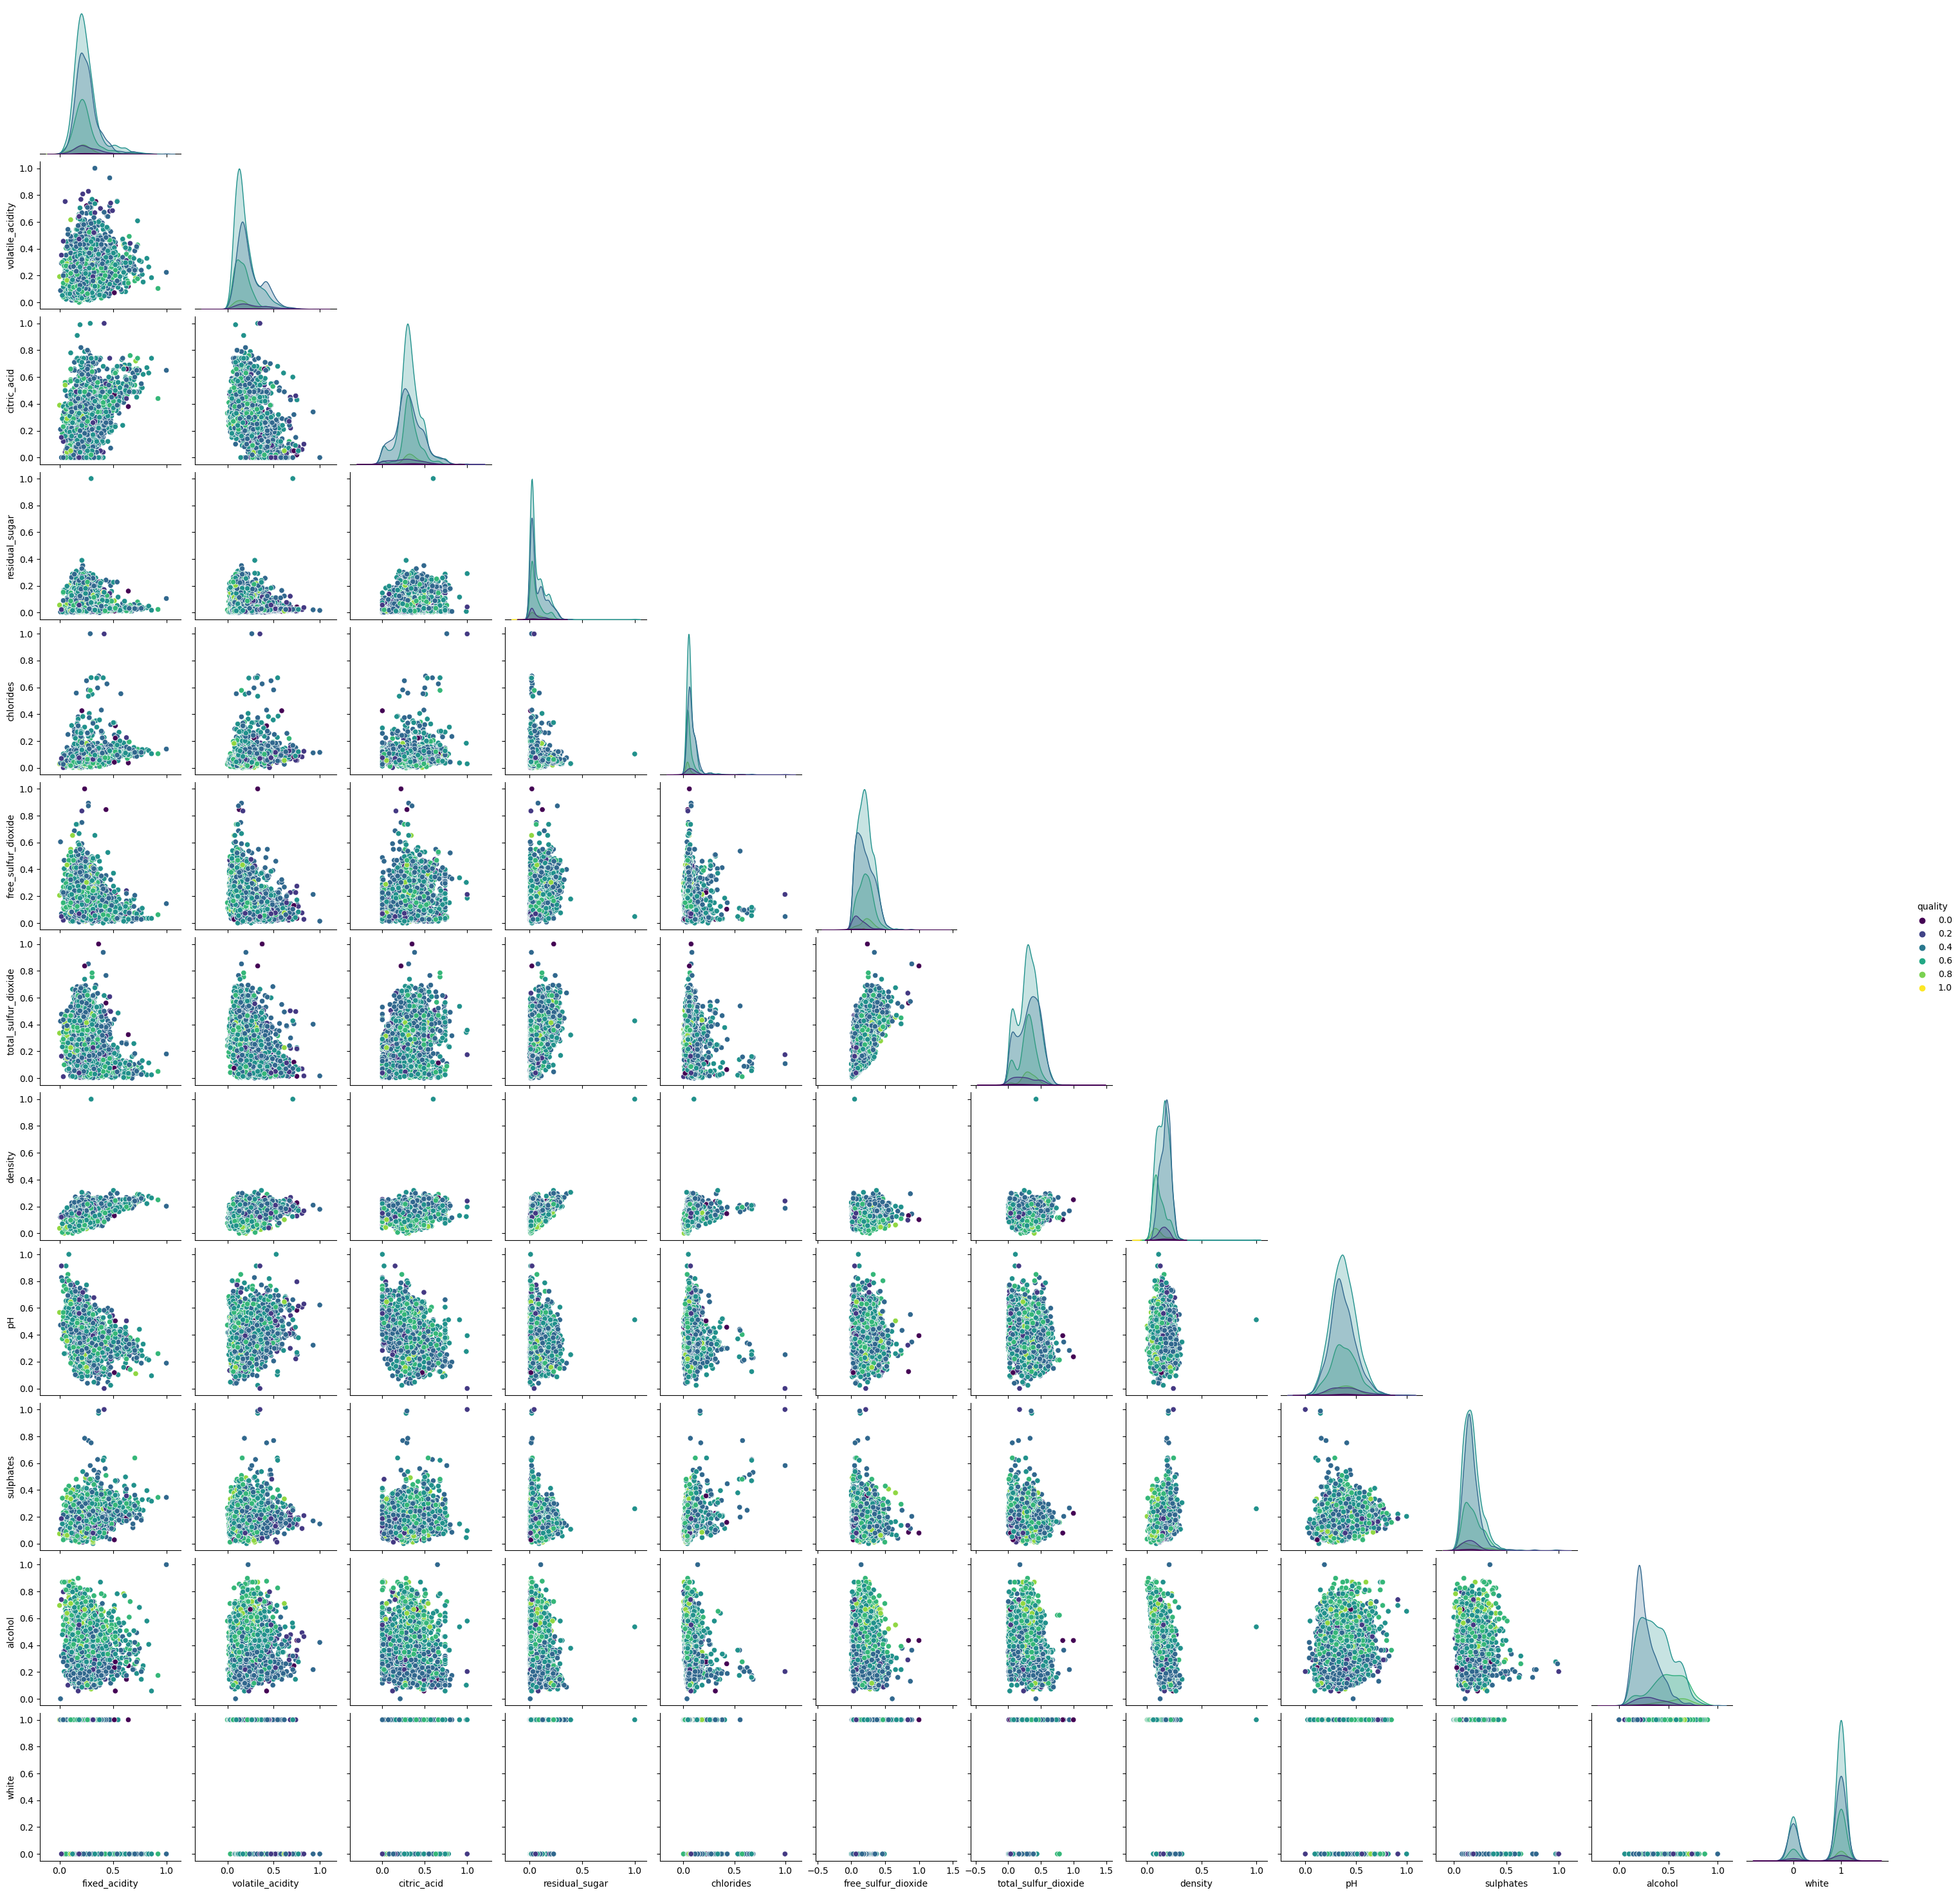

In [9]:
# pairplot with hue of quality
sns.pairplot(data=train_prep, corner=True, hue='quality', palette='viridis')
plt.show()

## Q2. Does the pH differ across density?

In [10]:
# cluster on two features
X1 =train_prep[['pH','density']]

In [11]:
# use the functions I created above

train_prep, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_prep, X1, 3)

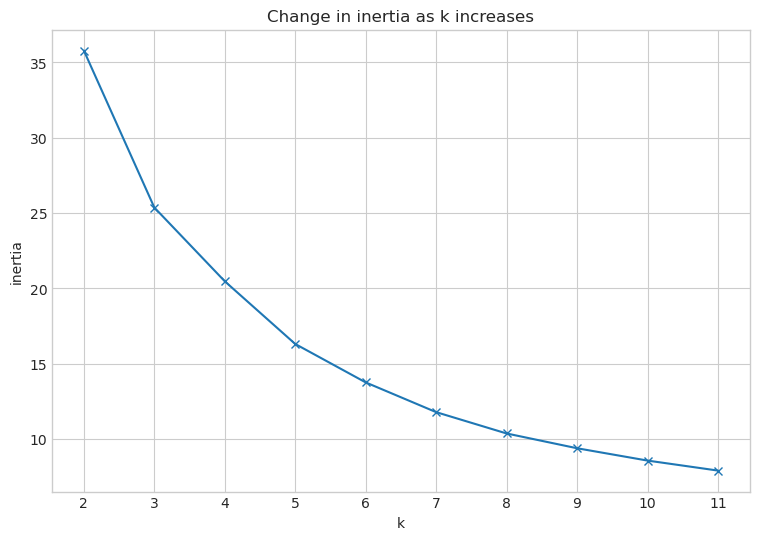

In [12]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '3' or '5' as the best values for k

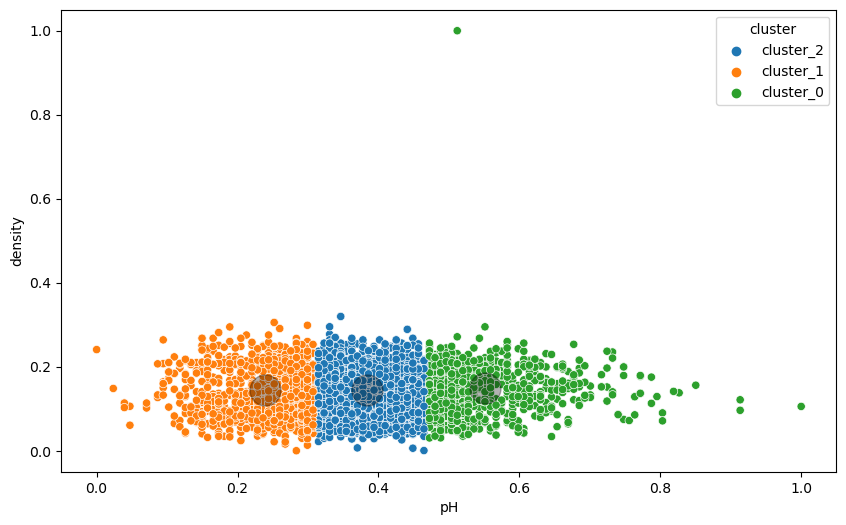

In [13]:
# use the functions I created above to plot the data

e.create_scatter_plot('pH','density',train_prep,kmeans, X_scaled, scaler)

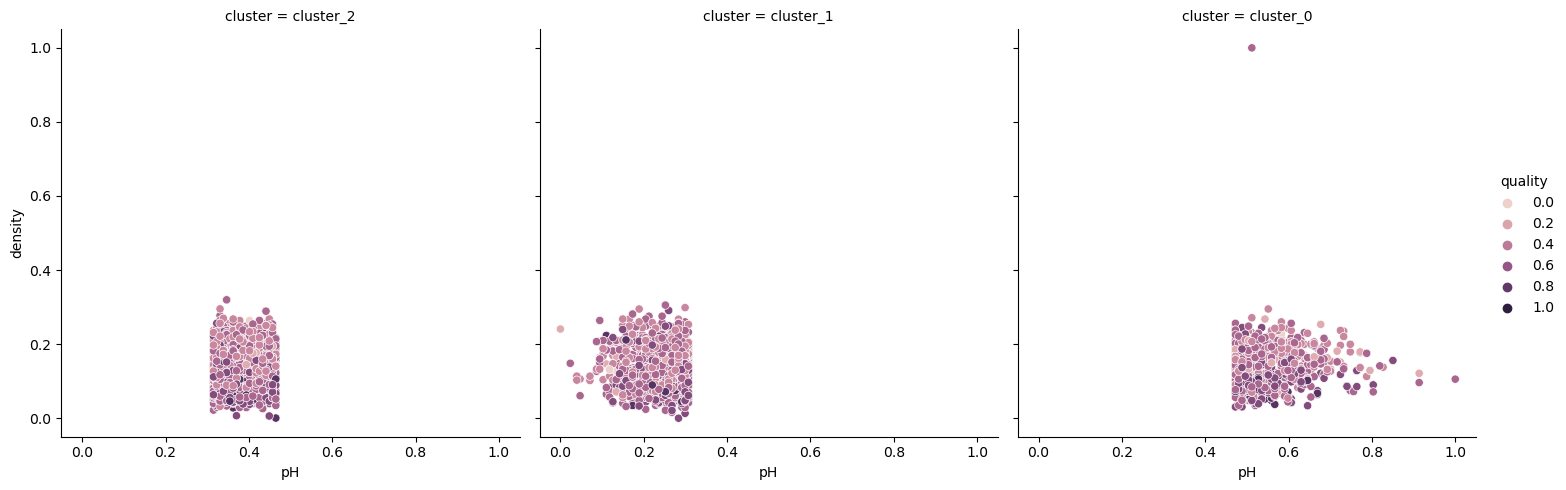

In [14]:
# lets visualize clusters by pH and density for white wine

sns.relplot(x = 'pH', y = 'density', data = train_prep, col = 'cluster', hue = 'quality')

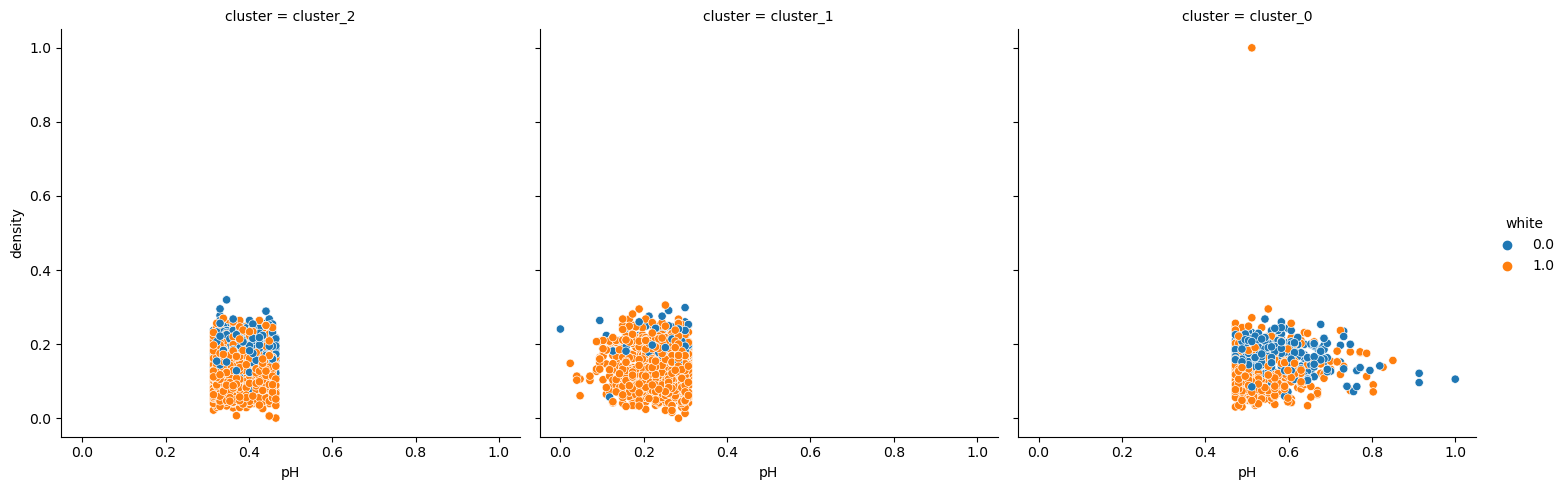

In [15]:
# lets visualize clusters by volatile acidity and alchol for white wine

sns.relplot(x = 'pH', y = 'density', data = train_prep, col = 'cluster', hue = 'white')

### Thoughts
- more white wines have a lower pH thatn red wines
- average wine have various levels of pH and density

#### Spearman R¶
(alpha = 0.05)

- Ho: there is no linear correlation between pH and density
- Ha: there is linear correlation between pH and density

In [16]:
stats.spearmanr(train_prep.pH, train_prep.density)

SignificanceResult(statistic=0.008670088822849694, pvalue=0.5884079313427192)

- there is no linear correlation between pH and density
- no relation due to pvalue over alpha

In [17]:
train_prep.head(3)

fixed_acidity     volatile_acidity          citric_acid  \
wine_id                                                                  
w-2549                  0.17                 0.14                 0.42   
w-4295                  0.26                 0.11                 0.28   
r-956                   0.36                 0.10                 0.52   

              residual_sugar            chlorides  free_sulfur_dioxide  \
wine_id                                                                  
w-2549                  0.10                 0.06                 0.42   
w-4295                  0.13                 0.06                 0.14   
r-956                   0.02                 0.13                 0.05   

         total_sulfur_dioxide              density                   pH  \
wine_id                                                                   
w-2549                   0.56                 0.16                 0.36   
w-4295                   0.32                 0.15                 0.28   
r-956                    0.05                 0.18                 0.49   

                   sulphates              alcohol              quality  \
wine_id                                                                  
w-2549                  0.17                 0.22                 0.50   
w-4295                  0.18                 0.41                 0.33   
r-956                   0.25                 0.35                 0.33   

                       white    cluster  
wine_id                                  
w-2549                  1.00  cluster_2  
w-4295                  1.00  cluster_1  
r-956                   0.00  cluster_0

In [18]:
# cluster on two features
X2 =train_prep[['volatile_acidity', 'alcohol']]

In [19]:
# use the functions I created above

train_prep, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_prep, X2, 4)

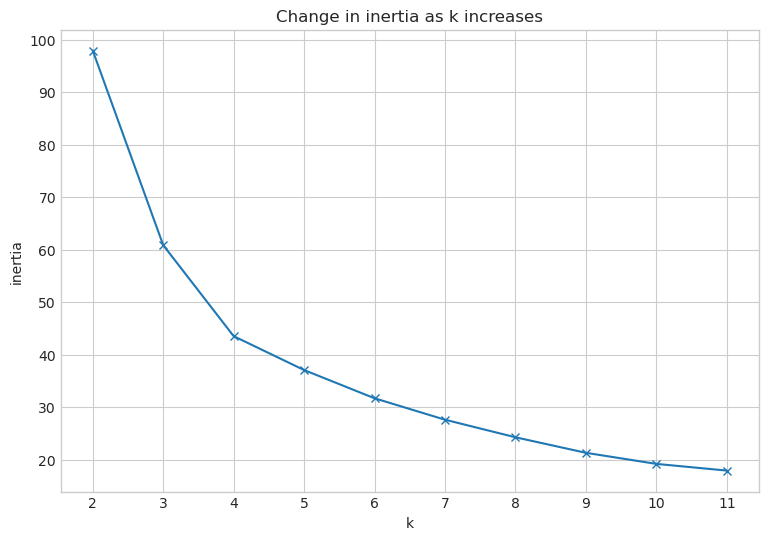

In [20]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '4' as the best values for k

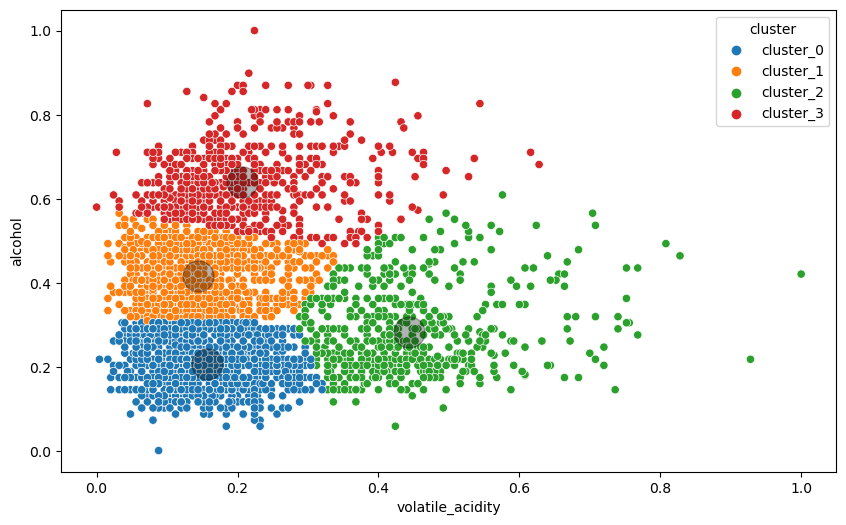

In [21]:
# use the functions I created above to plot the data

e.create_scatter_plot('volatile_acidity', 'alcohol',train_prep,kmeans, X_scaled, scaler)

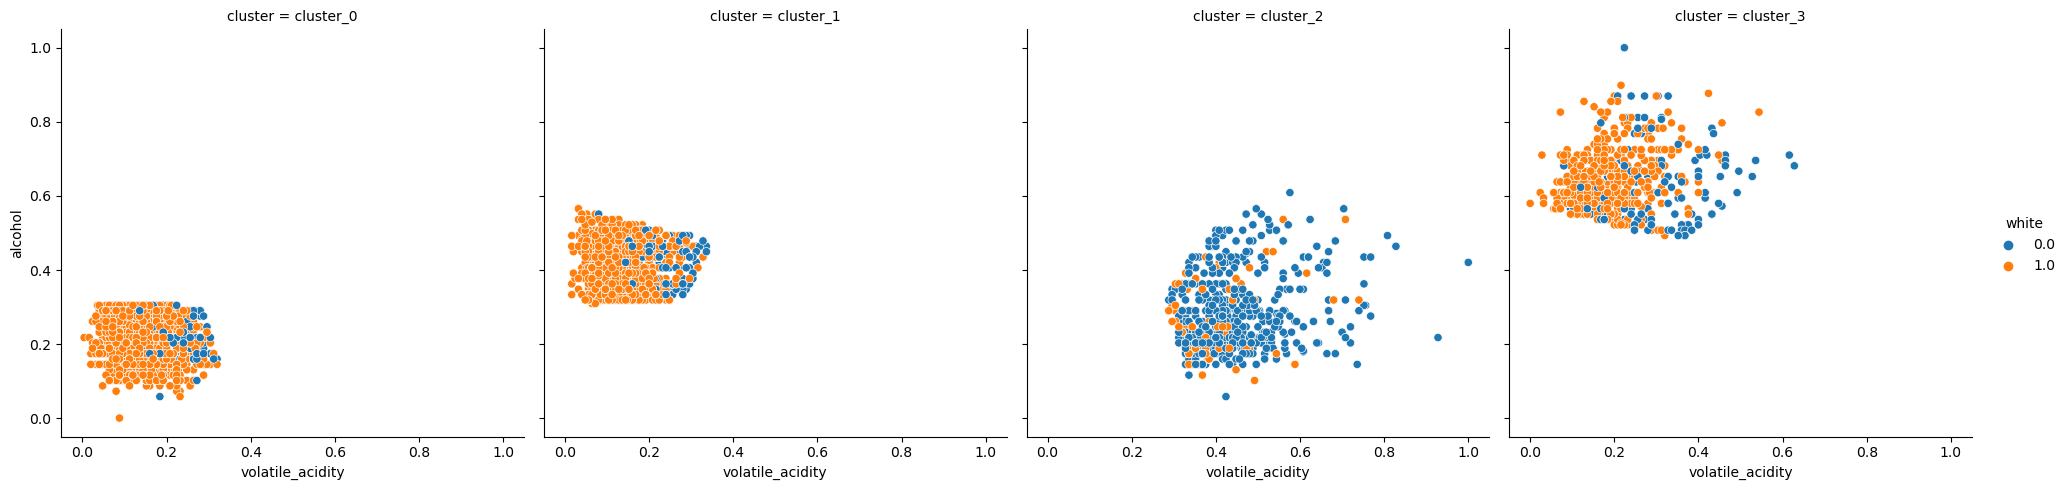

In [22]:
# lets visualize clusters by volatile acidity and alchol for white wine

sns.relplot(x = 'volatile_acidity', y = 'alcohol', data = train_prep, col = 'cluster', hue = 'white')

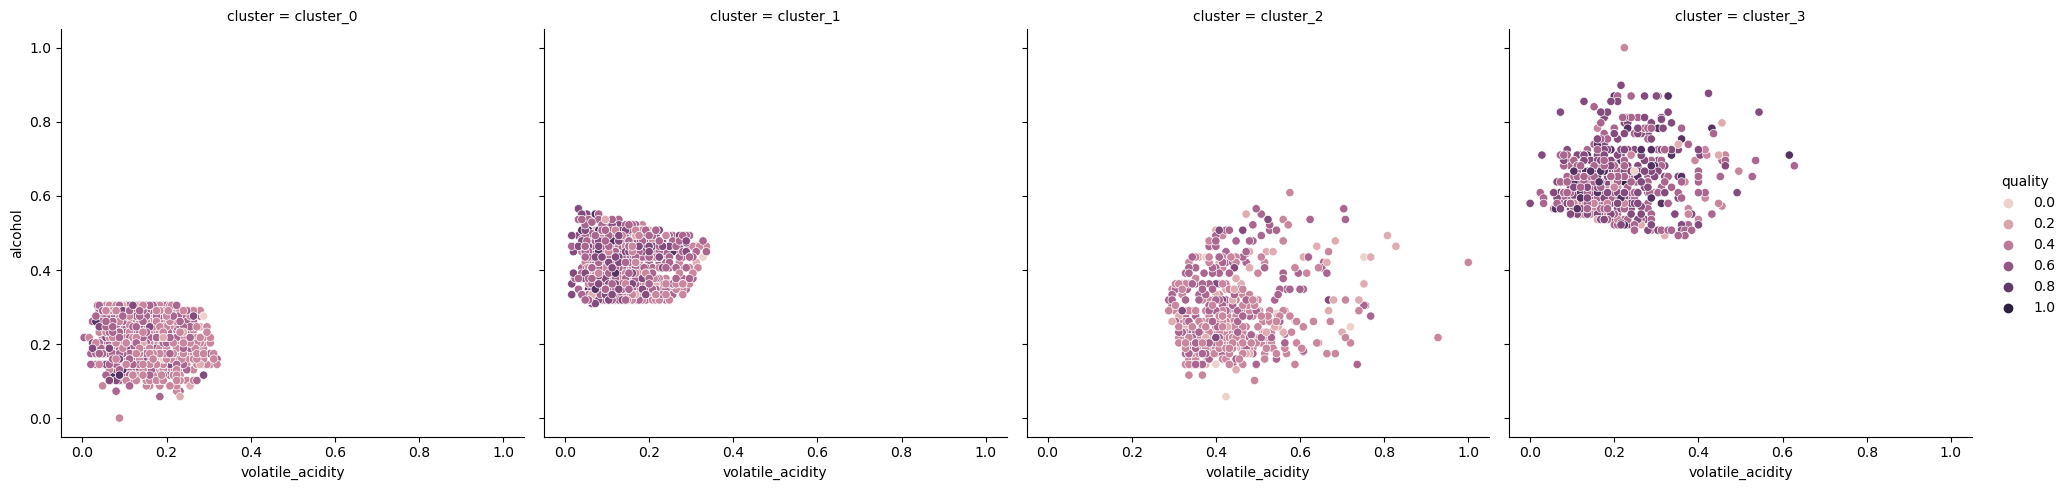

In [23]:
sns.relplot(x = 'volatile_acidity', y = 'alcohol', data = train_prep, col = 'cluster', hue = 'quality')

### Thoughts
- white wines have a lower volatile_acidity than the red wines
- average wines have average to lower alcohol levels
- higer quality wines usually have higher alcohol and somewhat low volitile acidity
- most red wines have medium to high volatile acidity

### Spearman R
(alpha = 0.05)
- Ho: there is no linear correlation between volatile_acidity and alcohol
- Ha: there is linear correlation between volatile_acidity and alcohol

In [24]:
stats.spearmanr(train_prep.volatile_acidity, train_prep.alcohol)

SignificanceResult(statistic=-0.015051397515591492, pvalue=0.3474893600568689)

- there is no linear correlation between volatile_acidity and alcohol
- no strong correlation

In [25]:
# cluster on two features
X3 =train_prep[['volatile_acidity', 'free_sulfur_dioxide']]

In [26]:
# use the functions I created above

train_prep, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_prep, X3, 3)

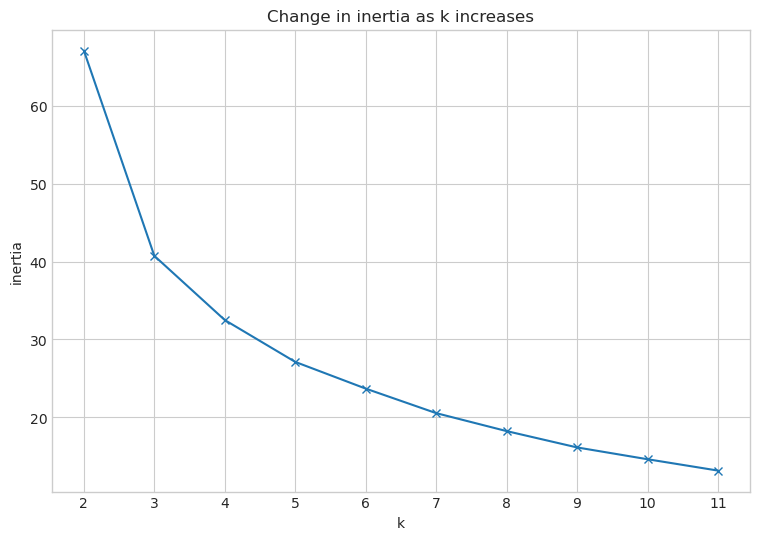

In [27]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '3' as the best values for k

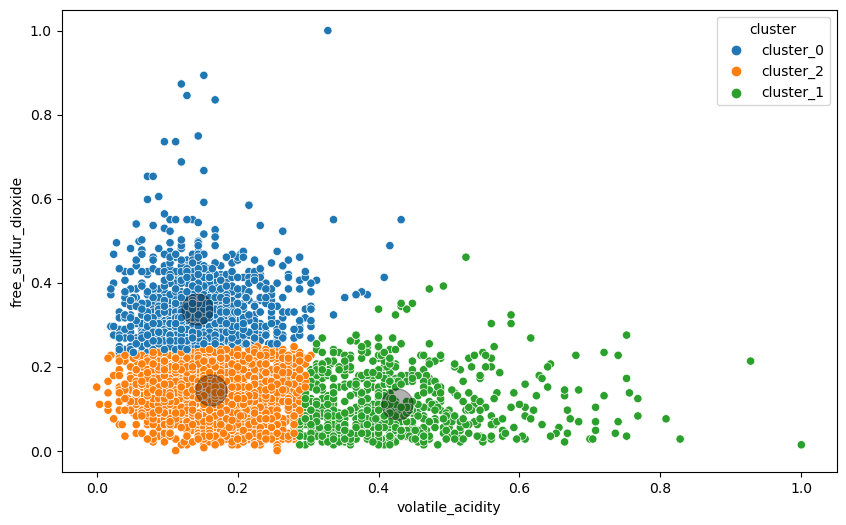

In [28]:
# use the functions I created above to plot the data

e.create_scatter_plot('volatile_acidity', 'free_sulfur_dioxide',train_prep,kmeans, X_scaled, scaler)

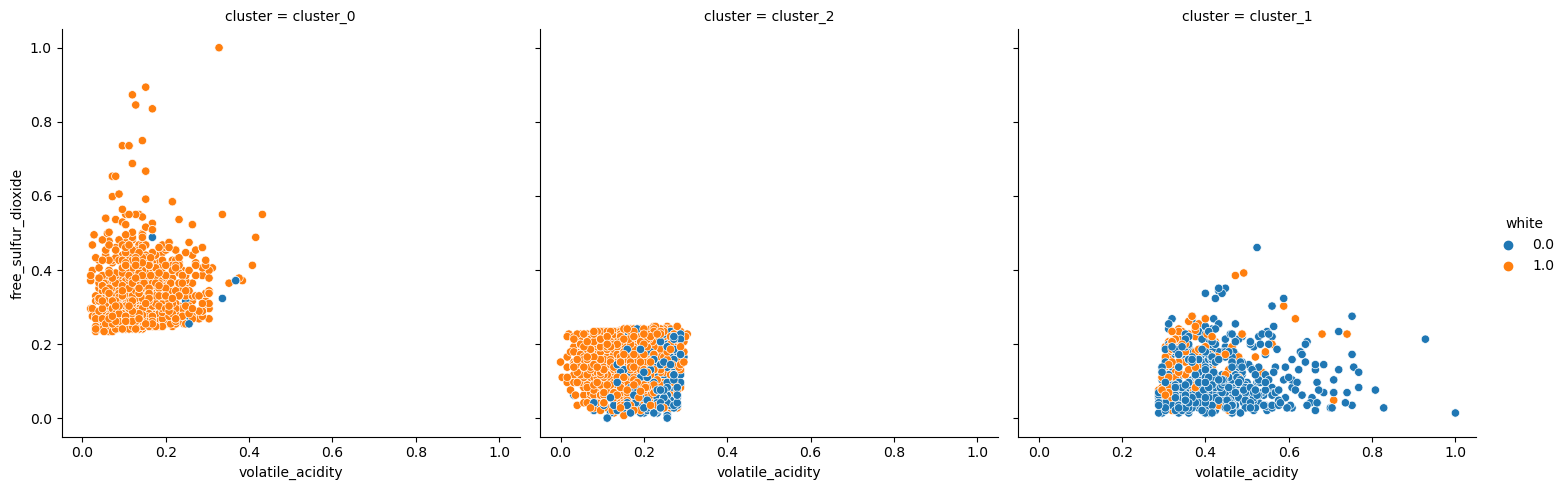

In [29]:
# lets visualize clusters by volatile acidity and free sulfur dioxide for white wine

sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_prep, col = 'cluster', hue = 'white')

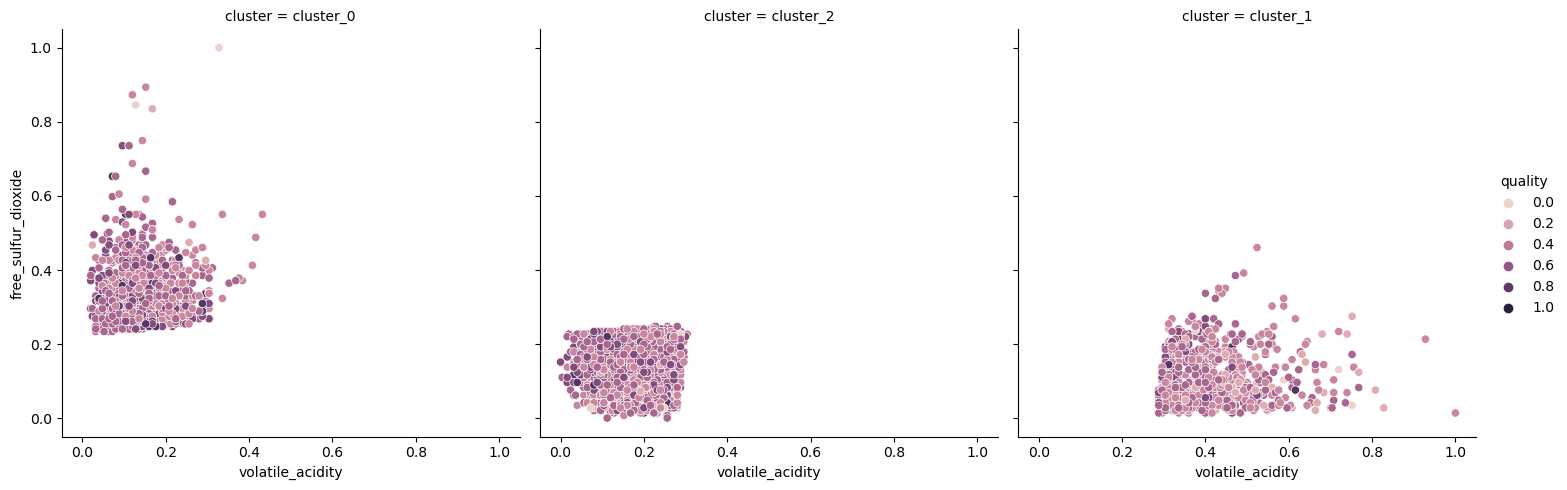

In [30]:
sns.relplot(x = 'volatile_acidity', y = 'free_sulfur_dioxide', data = train_prep, col = 'cluster', hue = 'quality')

### Thoughts
- most white wines have low volatile_acidity and high free_sulfur_dioxide
- data with these two features is well mixed
- no apperent patterns to show

#### Spearman R¶
(alpha = 0.05)

- Ho: there is no linear correlation between volatile_acidity and free_sulfur_dioxide
- Ha: there is linear correlation between volatile_acidity and free_sulfur_dioxide

In [31]:
stats.spearmanr(train_prep.volatile_acidity, train_prep.free_sulfur_dioxide)

SignificanceResult(statistic=-0.3676247063655699, pvalue=5.048663672328376e-125)

- there is no linear correlation between volatile_acidity and free_sulfur_dioxide
- however, there does appear to be some kind of non-linear relationship

In [32]:
# cluster on two features
X4 =train_prep[['citric_acid', 'total_sulfur_dioxide']]

In [33]:
# use the functions I created above

train_prep, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_prep, X4, 5)

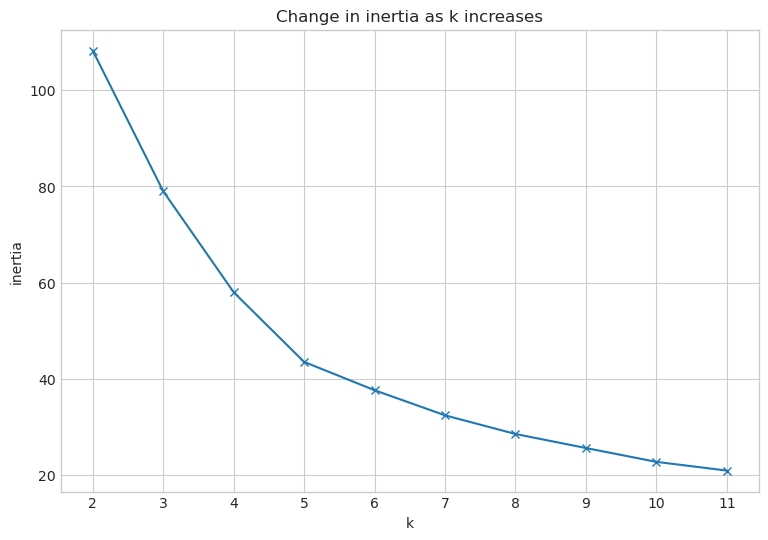

In [34]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '5' as the best values for k

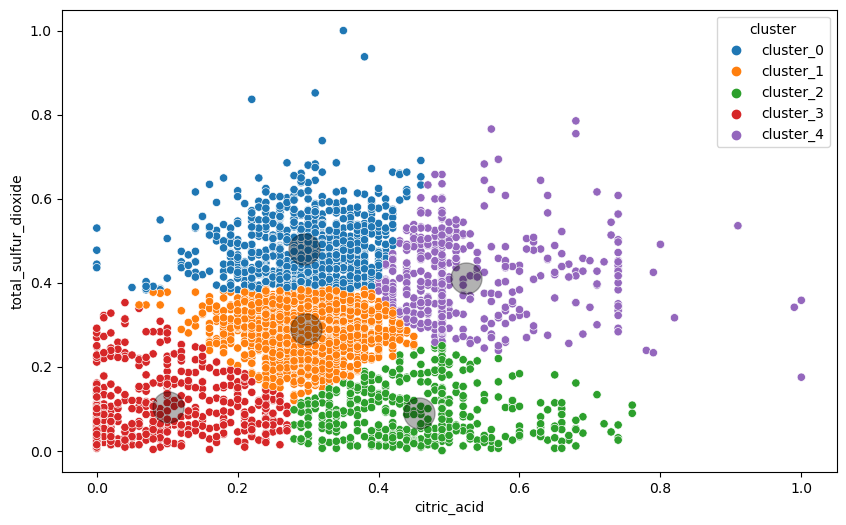

In [35]:
# use the functions I created above to plot the data

e.create_scatter_plot('citric_acid', 'total_sulfur_dioxide',train_prep,kmeans, X_scaled, scaler)

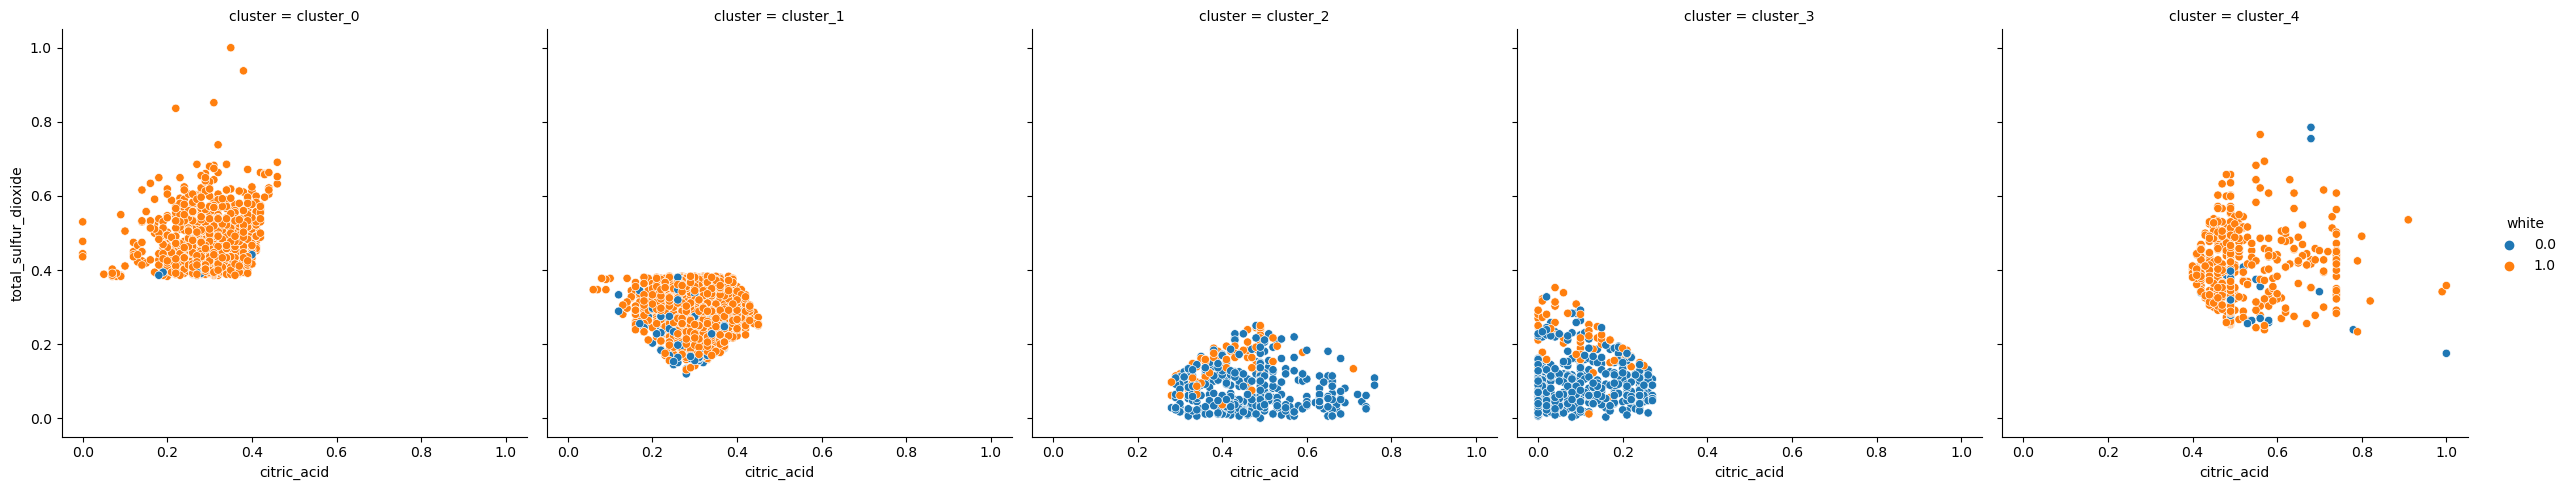

In [36]:
# lets visualize clusters by citric acid and total sulfur dioxide for white wines 

sns.relplot(x = 'citric_acid', y = 'total_sulfur_dioxide', data = train_prep, col = 'cluster', hue = 'white')

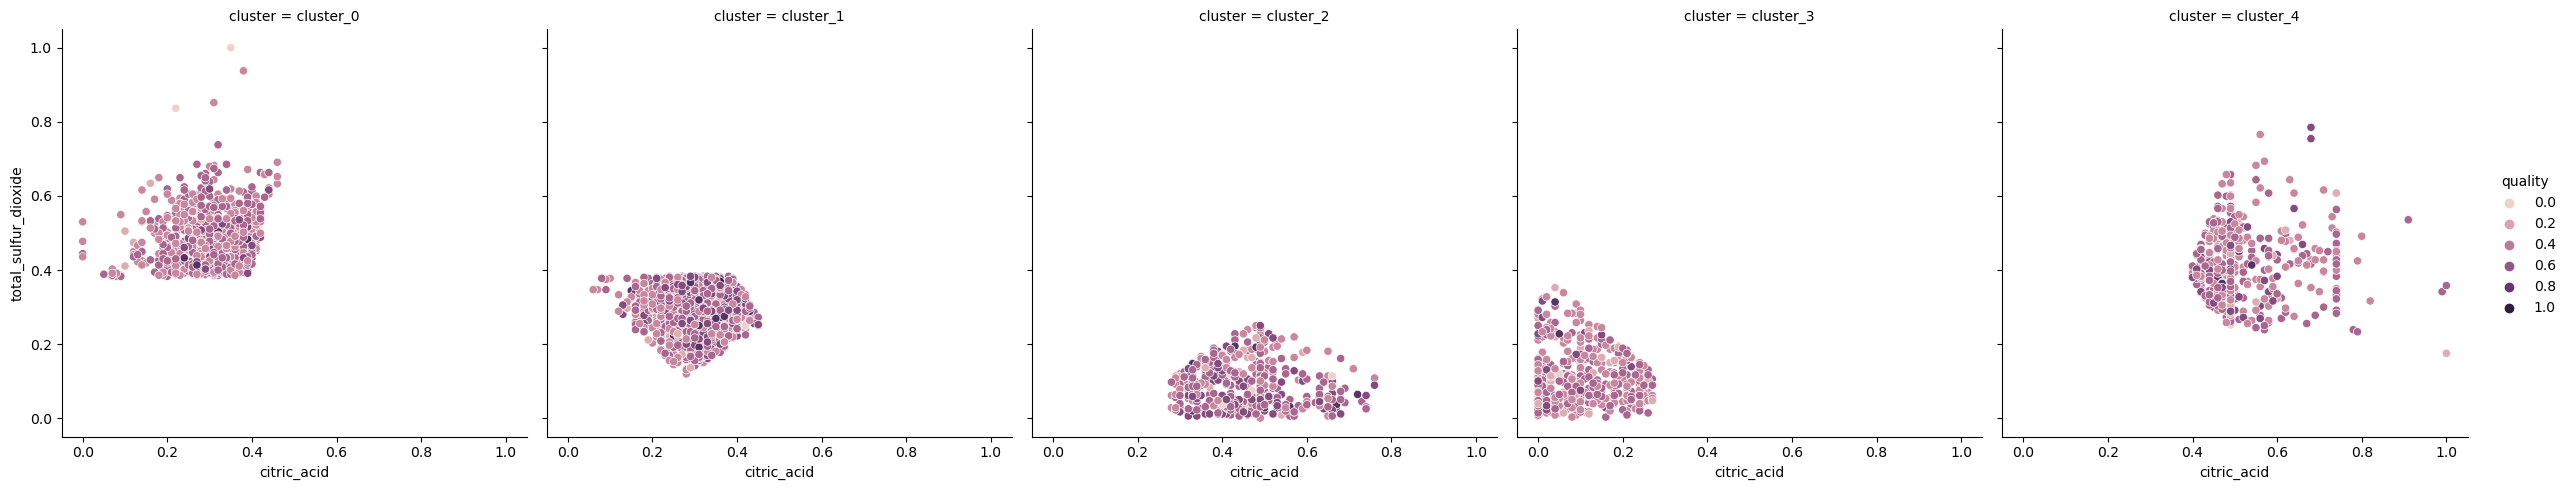

In [37]:
sns.relplot(x = 'citric_acid', y = 'total_sulfur_dioxide', data = train_prep, col = 'cluster', hue = 'quality')

### Thoughts
- white wines have higher total_sulfur_dioxide 
- red wine has a lower total_sulfur_dioxide than white wine
- quality of wines are stattered throughout

#### Spearman R¶¶
(alpha = 0.05)

- Ho: there is no linear correlation between citric_acid and total_sulfur_dioxide
- Ha: there is linear correlation between citric_acid and total_sulfur_dioxide

In [38]:
stats.spearmanr(train_prep.citric_acid, train_prep.total_sulfur_dioxide)

SignificanceResult(statistic=0.16155508497040533, pvalue=3.3125688925032825e-24)

- there is no linear correlation between citric_acid and total_sulfur_dioxide
- however, there does appear to be some kind of non-linear relationship (very low)

In [39]:
# cluster on two features
X5 =train_prep[['chlorides', 'sulphates']]

In [40]:
# use the functions I created above

train_prep, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_prep, X5, 5)

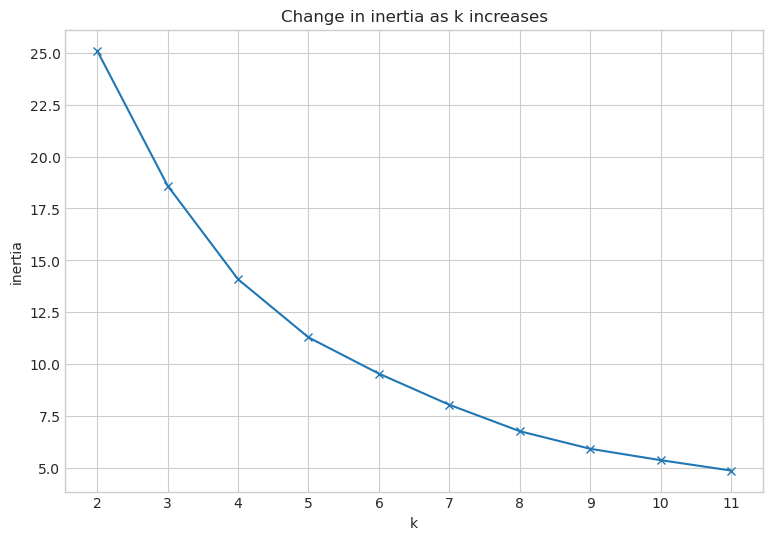

In [41]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '5' as the best values for k

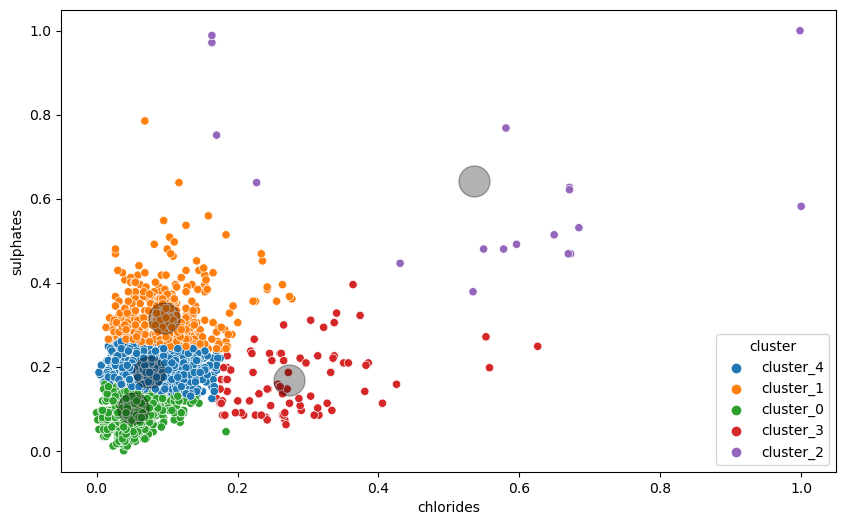

In [42]:
# use the functions I created above to plot the data

e.create_scatter_plot('chlorides','sulphates',train_prep,kmeans, X_scaled, scaler)

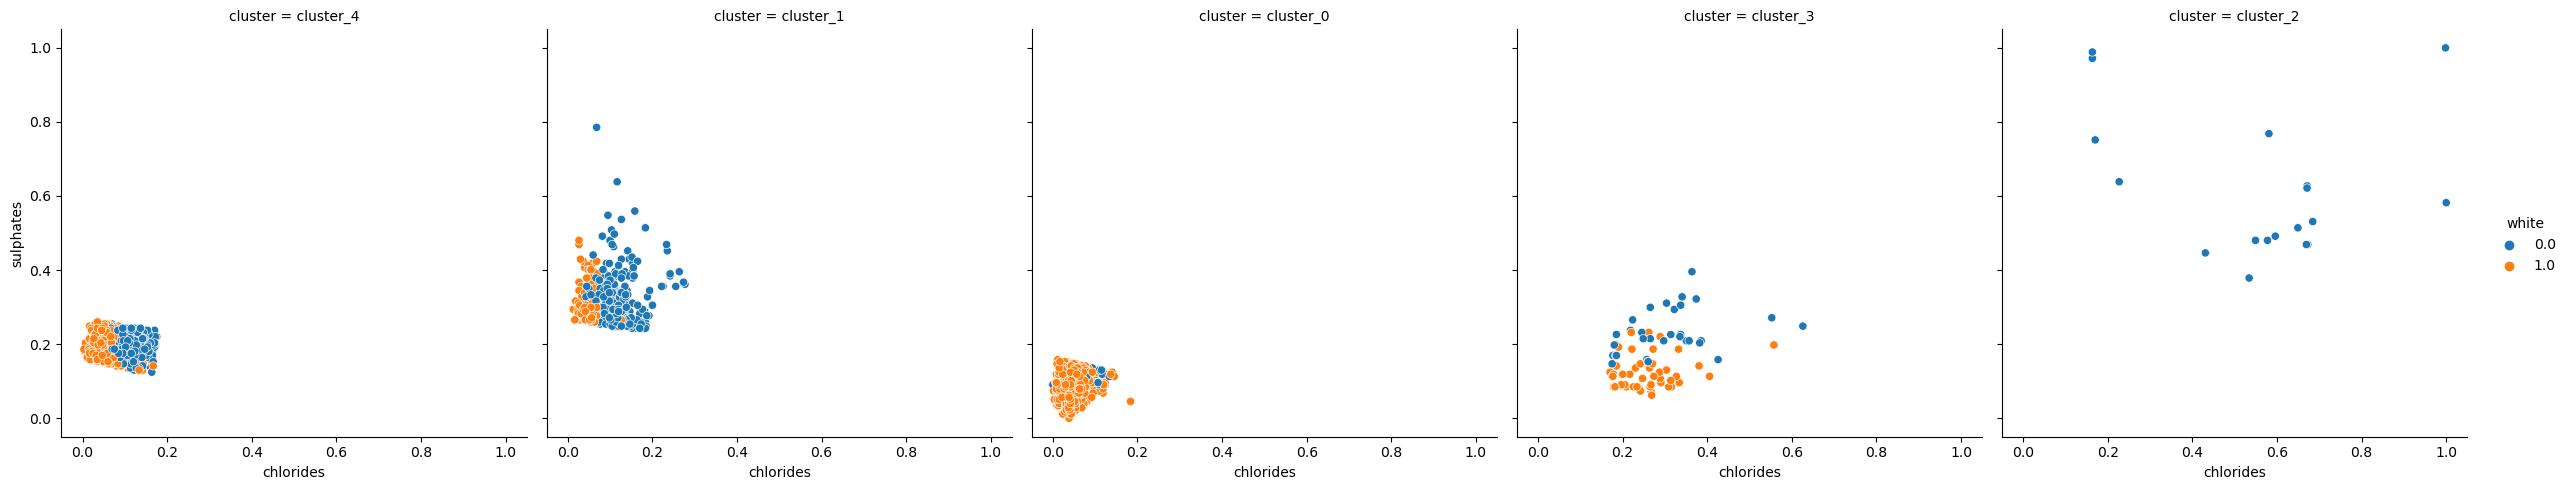

In [43]:
# lets visualize clusters by chlorides and sulphates for white wines

sns.relplot(x = 'chlorides', y = 'sulphates', data = train_prep, col = 'cluster', hue = 'white')

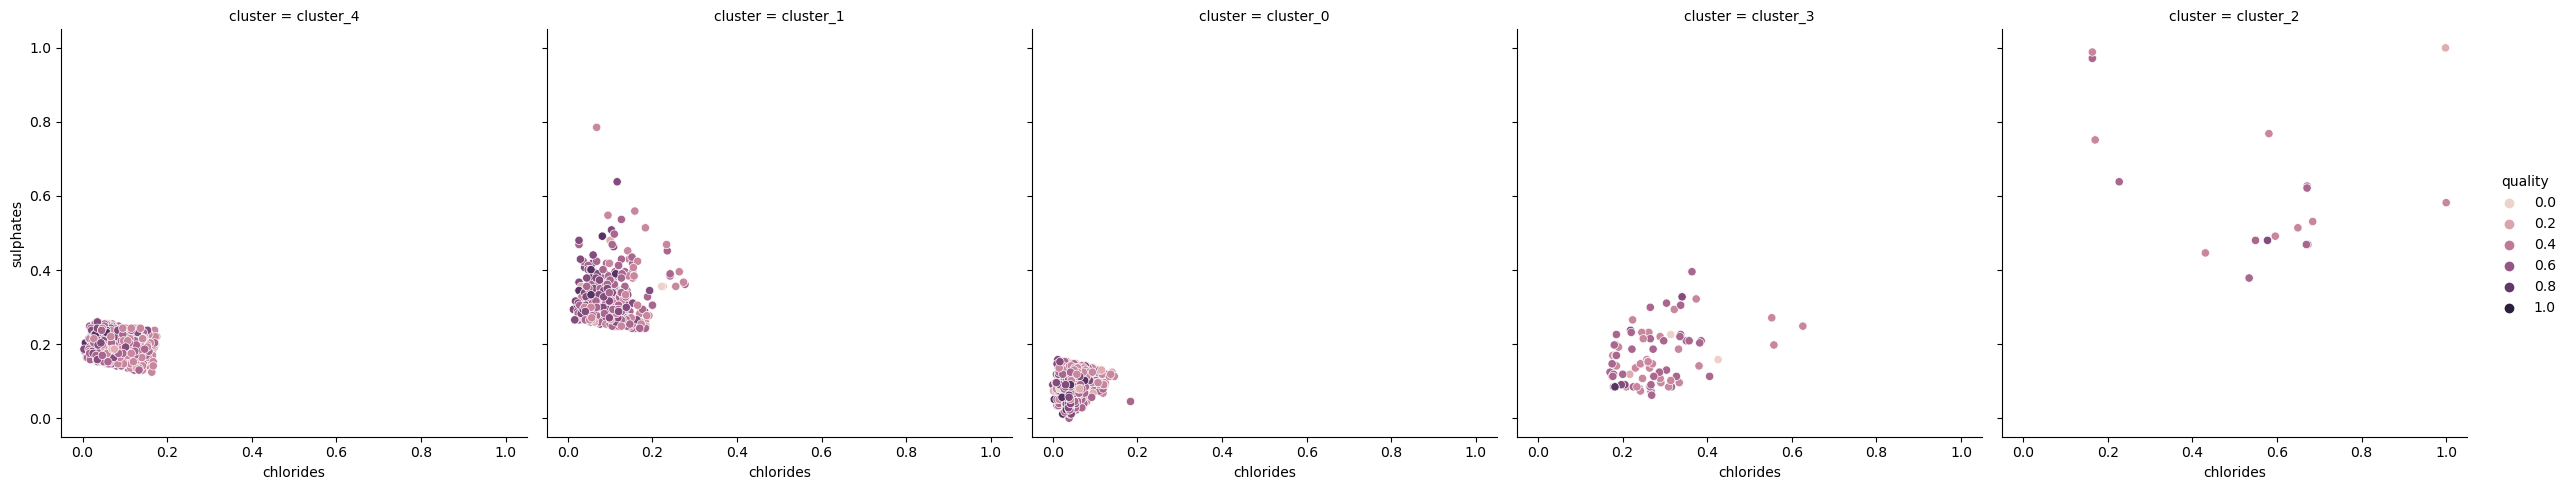

In [44]:
# lets visualize clusters by chlorides and sulphates for quality

sns.relplot(x = 'chlorides', y = 'sulphates', data = train_prep, col = 'cluster', hue = 'quality')

### Thoughts
- white wines are usually low chlorides and low sulphates
- many red wines have higher chlorides and sulphates
- the majority of high quality wines have low chlorides

#### Spearman R¶¶
(alpha = 0.05)

- Ho: there is no linear correlation between citric_acid and total_sulfur_dioxide
- Ha: there is linear correlation between citric_acid and total_sulfur_dioxide

In [45]:
stats.spearmanr(train_prep.citric_acid, train_prep.total_sulfur_dioxide)

SignificanceResult(statistic=0.16155508497040533, pvalue=3.3125688925032825e-24)

- there is no linear correlation between citric_acid and total_sulfur_dioxide
- however, there does appear to be some kind of non-linear relationship (very low)

In [46]:
# cluster on two features
X6 =train_prep[['sulphates', 'alcohol']]

In [47]:
# use the functions I created above

train_prep, X_scaled, scaler, kmeans, centroids = e.create_cluster(train_prep, X6, 3)

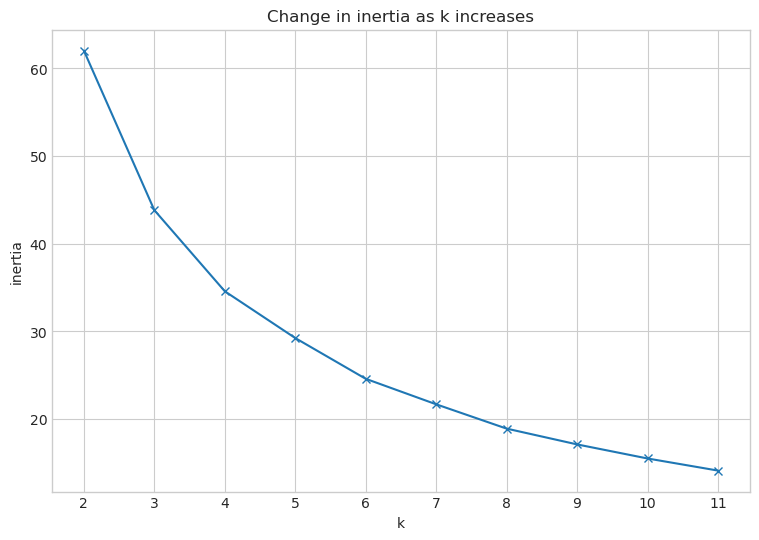

In [48]:
# explore what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

the elbow chart above seems to suggest either '3' as the best values for k

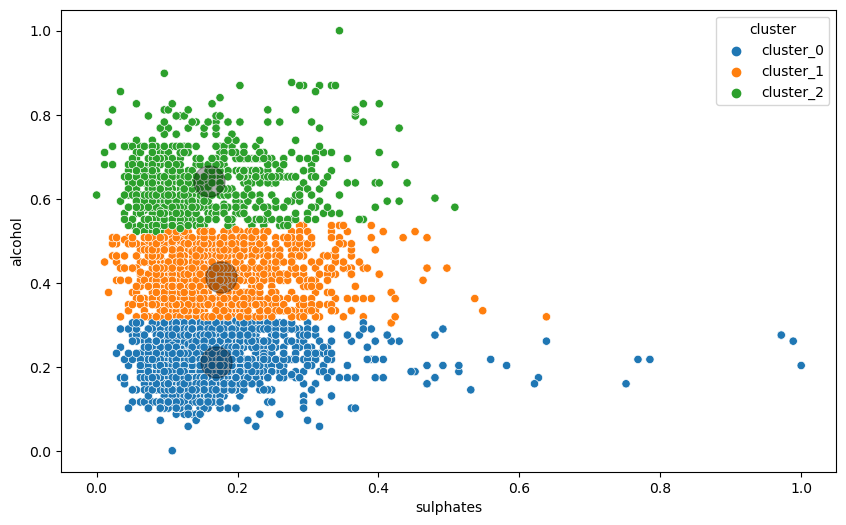

In [49]:
# use the functions I created above to plot the data

e.create_scatter_plot('sulphates','alcohol',train_prep,kmeans, X_scaled, scaler)

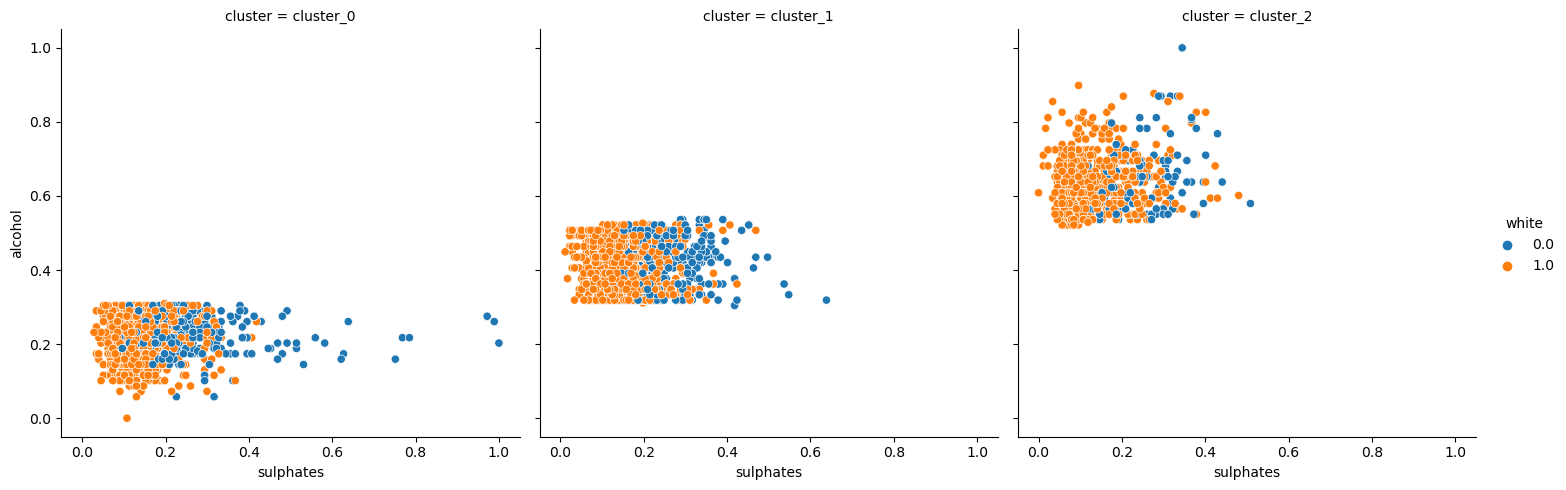

In [50]:
# lets visualize clusters by chlorides and sulphates for white wines

sns.relplot(x ='sulphates', y = 'alcohol', data = train_prep, col = 'cluster', hue = 'white')

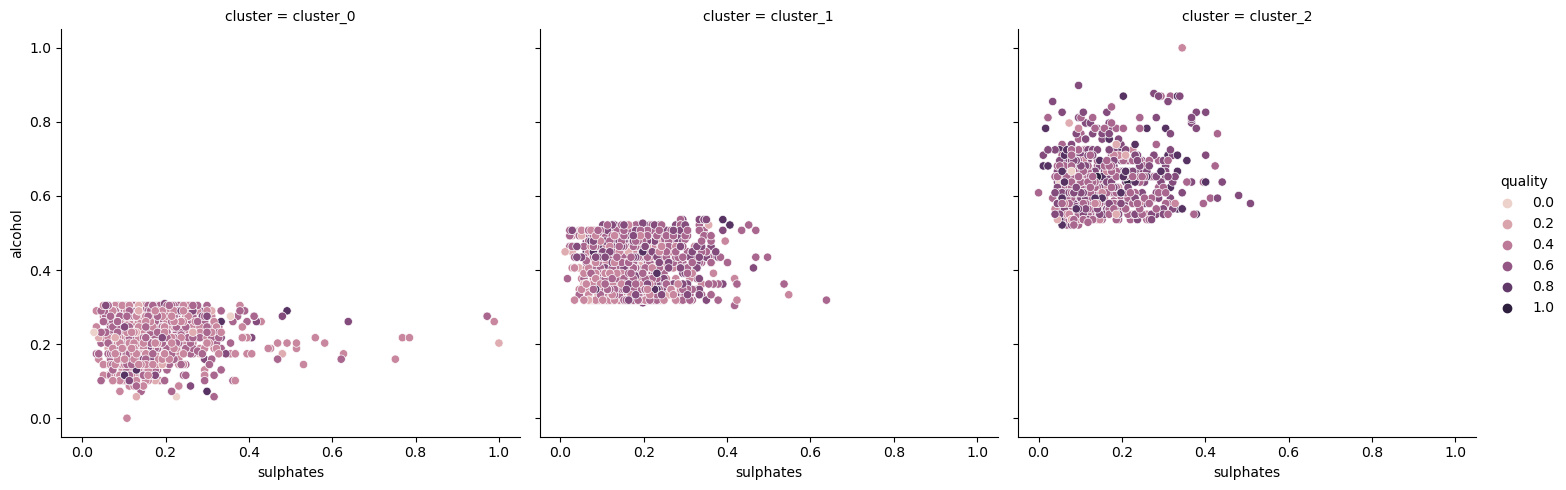

In [51]:
# lets visualize clusters by chlorides and sulphates for quality

sns.relplot(x ='sulphates', y = 'alcohol', data = train_prep, col = 'cluster', hue = 'quality')

### Thoughts
- the majority of high quality wines have medium to high levels of alcohol

#### Spearman R¶¶
(alpha = 0.05)

- Ho: there is no linear correlation between alcohol and sulphates
- Ha: there is linear correlation between alcohol and sulphates

In [52]:
stats.spearmanr(train_prep.alcohol, train_prep.sulphates)

SignificanceResult(statistic=-0.0030889677653290477, pvalue=0.8471194318977447)

- there is no linear correlation between alcohol and sulphates
- no correlation

## Exploration Summary
* After our exploration we have decided to use the Spearmans R stats testing, before modeling. 

* Some finding after exploration

    * more white wines have a lower pH thatn red wines
    * average wine have various levels of pH and density
    * there is no linear correlation between volatile_acidity and alcohol no strong correlation
    * white wines have a lower volatile_acidity than the red wines
    * average wines have average to lower alcohol levels
    * higer quality wines usually have higher alcohol and somewhat low volitile acidity
    * most red wines have medium to high volatile acidity
    * there is no linear correlation between volatile_acidity and free_sulfur_dioxide
    * however, there does appear to be some kind of non-linear relationship
    * white wines are usually low chlorides and low sulphates
    * many red wines have higher chlorides and sulphates
    * the majority of high quality wines have low chlorides
    * there is no linear correlation between citric_acid and total_sulfur_dioxide
    * however, there does appear to be some kind of non-linear relationship (very low)
    * there is no linear correlation between alcohol and sulphates no correlation


## Modeling


* We dicided to go with Classsification ML and used KNN, Logistic Regress, Decision Tree, and Random Forest for modeling we as well adding clustering to or modeling we decided it gives it a better outcome and more accurate model. 

* For the baseline we created an accuracy score based on wanting to get a correct out come vs an incorrect outcome which to lead to less money spent. 

In [53]:
df.head(3)

fixed_acidity     volatile_acidity          citric_acid  \
wine_id                                                                  
w-1                     7.00                 0.27                 0.36   
w-2                     6.30                 0.30                 0.34   
w-3                     8.10                 0.28                 0.40   

              residual_sugar            chlorides  free_sulfur_dioxide  \
wine_id                                                                  
w-1                    20.70                 0.04                45.00   
w-2                     1.60                 0.05                14.00   
w-3                     6.90                 0.05                30.00   

         total_sulfur_dioxide              density                   pH  \
wine_id                                                                   
w-1                    170.00                 1.00                 3.00   
w-2                    132.00                 0.99                 3.30   
w-3                     97.00                 1.00                 3.26   

                   sulphates              alcohol  quality  color  
wine_id                                                            
w-1                     0.45                 8.80        6  white  
w-2                     0.49                 9.50        6  white  
w-3                     0.44                10.10        6  white

In [54]:
def label_type(row):
    if 1 <= row['quality'] <= 4:
        return 'low'
    elif 5 <= row['quality'] <= 7:
        return 'average'
    elif 8 <= row['quality'] <= 10:
        return 'high'

df['type'] = df.apply(label_type, axis=1)

In [55]:
train, validate, test = e.split_data(df)


    train -> (3898, 14)
    validate -> (1299, 14)
    test -> (1300, 14)


In [56]:
train.head(3)

fixed_acidity     volatile_acidity          citric_acid  \
wine_id                                                                  
w-2549                  6.30                 0.26                 0.42   
w-4295                  7.40                 0.22                 0.28   
r-956                   8.50                 0.21                 0.52   

              residual_sugar            chlorides  free_sulfur_dioxide  \
wine_id                                                                  
w-2549                  7.10                 0.04                62.00   
w-4295                  9.00                 0.05                22.00   
r-956                   1.90                 0.09                 9.00   

         total_sulfur_dioxide              density                   pH  \
wine_id                                                                   
w-2549                 209.00                 1.00                 3.20   
w-4295                 121.00                 0.99                 3.10   
r-956                   23.00                 1.00                 3.36   

                   sulphates              alcohol  quality  color     type  
wine_id                                                                     
w-2549                  0.53                 9.50        6  white  average  
w-4295                  0.55                10.80        5  white  average  
r-956                   0.67                10.40        5    red  average

## Need to scale data

In [57]:
dummy_df = pd.get_dummies(train.color, dtype=int, drop_first=True)
train = pd.concat([train, dummy_df], axis=1)

dummy_df = pd.get_dummies(validate.color, dtype=int, drop_first=True)
validate = pd.concat([validate, dummy_df], axis=1)

dummy_df = pd.get_dummies(test.color, dtype=int, drop_first=True)
test = pd.concat([test, dummy_df], axis=1)

In [60]:
# We'll do exploration and train our model on the train data
X_train = train.drop(columns=["quality", 'type'])
y_train = train["quality"]

# We tune our model on validate, since it will be out-of-sample until we use it.
X_validate = validate.drop(columns=["quality",'type'])
y_validate = validate["quality"]

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=["quality","type"])
y_test = test["quality"]


In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [62]:
correlation = train.drop(columns='type').corr()
print(correlation["quality"].sort_values(ascending=False), "\n")

quality                                1.00
alcohol                                0.44
white                                  0.12
citric_acid                            0.10
free_sulfur_dioxide                    0.07
sulphates                              0.05
pH                                     0.02
total_sulfur_dioxide                  -0.03
residual_sugar                        -0.04
fixed_acidity                         -0.07
chlorides                             -0.18
volatile_acidity                      -0.26
density                               -0.30
Name: quality, dtype: float64 



__Going to scale every continous feature__

## Decided to try a robust scaler create a function for it

In [63]:
def model_prep_wine_scaled(X_train, X_validate, X_test):
    '''Takes the X train, validate, and test and fits them to a RobustScaler
    
    
    return X_train_scaled, X_validate_scaled, X_test_scaled'''
    # makes a copy of the dataframes
    X_train_scaled = X_train.copy()
    X_valid_scaled = X_validate.copy()
    X_test_scaled = X_test.copy()

    columns_to_scale = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

    scaler = RobustScaler()

    X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    X_valid_scaled[columns_to_scale] = scaler.transform(X_validate[columns_to_scale])
    X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    return X_train_scaled, X_valid_scaled, X_test_scaled

In [64]:
X_train_scaled, X_valid_scaled, X_test_scaled = model_prep_wine_scaled(X_train, X_validate, X_test)

In [65]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3898 entries, w-2549 to r-1240
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3898 non-null   float64
 1   volatile_acidity      3898 non-null   float64
 2   citric_acid           3898 non-null   float64
 3   residual_sugar        3898 non-null   float64
 4   chlorides             3898 non-null   float64
 5   free_sulfur_dioxide   3898 non-null   float64
 6   total_sulfur_dioxide  3898 non-null   float64
 7   density               3898 non-null   float64
 8   pH                    3898 non-null   float64
 9   sulphates             3898 non-null   float64
 10  alcohol               3898 non-null   float64
 11  color                 3898 non-null   object 
 12  white                 3898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 426.3+ KB


Going to use alcohol, white, and citric_acid for features

In [66]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [67]:
X_train_scaled.head(3)

fixed_acidity     volatile_acidity          citric_acid  \
wine_id                                                                  
w-2549                 -0.54                -0.18                 0.79   
w-4295                  0.31                -0.41                -0.21   
r-956                   1.15                -0.47                 1.50   

              residual_sugar            chlorides  free_sulfur_dioxide  \
wine_id                                                                  
w-2549                  0.68                -0.07                 1.32   
w-4295                  0.98                -0.04                -0.28   
r-956                  -0.16                 1.59                -0.80   

         total_sulfur_dioxide              density                   pH  \
wine_id                                                                   
w-2549                   1.16                 0.14                -0.05   
w-4295                   0.04                -0.03                -0.52   
r-956                   -1.21                 0.36                 0.71   

                   sulphates              alcohol  color  white  
wine_id                                                          
w-2549                  0.12                -0.42  white      1  
w-4295                  0.24                 0.26  white      1  
r-956                   0.94                 0.05    red      0

In [68]:
baseline_pred = np.repeat(y_train.mode(),len(y_train))

In [69]:
y_train

wine_id
w-2549    6
w-4295    5
r-956     5
w-1800    6
w-3442    5
         ..
w-2565    6
w-1760    5
w-4362    6
r-612     5
r-1240    4
Name: quality, Length: 3898, dtype: int64

In [70]:
# Drop the 'wine_id' column
X_train = X_train.drop('color', axis=1)
X_validate = X_validate.drop('color', axis=1)

### Best 3 Models

* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

In [71]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [72]:
# Cluster the data using KMeans
n_clusters = 4
baseline_acc = accuracy_score(y_train, baseline_pred)

kmeans = KMeans(n_clusters=n_clusters, random_state=123)
kmeans.fit(X_train)
X_train_clustered = kmeans.transform(X_train)
X_validate_clustered = kmeans.transform(X_validate)

### Adding cluster labels to the data

In [73]:
# Add the cluster labels to the original data
X_train_clustered_df = pd.DataFrame( X_train_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
)
X_train_clustered_df.index = X_train.index

X_train_clustered_df = pd.concat([X_train, X_train_clustered_df], axis=1)

X_validate_clustered_df = pd.DataFrame( X_validate_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
)

X_validate_clustered_df.index = X_validate.index

X_validate_clustered_df = pd.concat([X_validate, X_validate_clustered_df], axis=1)

### Random Forest

In [74]:
# Train and evaluate RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_clustered_df, y_train)

y_train_pred_rf = rf.predict(X_train_clustered_df)

y_validate_pred_rf = rf.predict(X_validate_clustered_df)

report_train_rf = classification_report(y_train, y_train_pred_rf)

report_validate_rf = classification_report(y_validate, y_validate_pred_rf)

### KNeighbors

In [75]:
# Train and evaluate KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train_clustered_df, y_train)

y_train_pred_knn = knn.predict(X_train_clustered_df.values)

y_validate_pred_knn = knn.predict(X_validate_clustered_df.values)

report_train_knn = classification_report(y_train, y_train_pred_knn)

report_validate_knn = classification_report(y_validate, y_validate_pred_knn)


### Logistic Regression

In [76]:
# Train and evaluate LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_clustered_df, y_train)

y_train_pred_lr = lr.predict(X_train_clustered_df)

y_validate_pred_lr = lr.predict(X_validate_clustered_df)

report_train_lr = classification_report(y_train, y_train_pred_lr)

report_validate_lr = classification_report(y_validate, y_validate_pred_lr)


### Decision Tree 

In [77]:
# Train and evaluate DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train_clustered_df, y_train)

y_train_pred_dt = dt.predict(X_train_clustered_df)

y_validate_pred_dt = dt.predict(X_validate_clustered_df)

report_train_dt = classification_report(y_train, y_train_pred_dt)

report_validate_dt = classification_report(y_validate, y_validate_pred_dt)

In [83]:
# Print classification reports for RandomForestClassifier
print("RandomForestClassifier:")
print("Training:")
print(report_train_rf)
print("Validation:")
print(report_validate_rf)
print(baseline_acc)

# Print classification reports for KNeighborsClassifier
print("\nKNeighborsClassifier:")
print("Training:")
print(report_train_knn)
print("Validation:")
print(report_validate_knn)
print(f"baseline_acc: {baseline_acc: }")

# Print classification reports for LogisticRegression
print("\nLogisticRegression:")
print("Training:")
print(report_train_lr)
print("Validation:")
print(report_validate_lr)
print(baseline_acc)

# Print classification reports for DecisionTreeClassifier
print("\nDecisionTreeClassifier:")
print("Training:")
print(report_train_dt)
print("Validation:")
print(report_validate_dt)
print(baseline_acc)

RandomForestClassifier:
Training:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00       130
           5       1.00      1.00      1.00      1283
           6       1.00      1.00      1.00      1701
           7       1.00      1.00      1.00       647
           8       1.00      1.00      1.00       116
           9       1.00      1.00      1.00         3

    accuracy                           1.00      3898
   macro avg       1.00      1.00      1.00      3898
weighted avg       1.00      1.00      1.00      3898

Validation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.09      0.16        43
           5       0.67      0.71      0.69       427
           6       0.62      0.75      0.68       567
           7       0.64      0.44      0.52       216
           8       0.83      0.2

### Test Model for Logistic Regression
* We chose Logistic Regression as the best model. The others were overfit and or train and validate accuracy we very skewed. 

In [79]:
X_test_scaled1 = X_test_scaled.drop(columns = ['color'])

In [80]:
# Transform test data using the fitted KMeans model
X_test_clustered = kmeans.transform(X_test_scaled1)

# Fit the Logistic Regression model on the transformed training data
lr.fit(X_train_clustered, y_train)

# Predict on the transformed training, validation, and test data
y_train_pred_lr = lr.predict(X_train_clustered)
y_validate_pred_lr = lr.predict(X_validate_clustered)
y_test_pred_lr = lr.predict(X_test_clustered)

# Generate classification reports for training, validation, and test data
report_train_lr = classification_report(y_train, y_train_pred_lr)
report_validate_lr = classification_report(y_validate, y_validate_pred_lr)
report_test_lr = classification_report(y_test, y_test_pred_lr)

In [81]:
# Print classification reports for LogisticRegression
# Print the transformed test data
print(X_test_clustered)

# Print the predictions for the test data
print(y_test_pred_lr)

# Print the classification report for the test data
print(report_test_lr)

[[150.23143271  38.36218246 203.26032262 103.68962091]
 [152.98197079  41.43147412 205.98222043 106.47316693]
 [150.08686707  38.30270152 203.11004723 103.5559172 ]
 ...
 [152.30201474  40.20544724 205.34386597 105.71858803]
 [150.22535274  38.39637009 203.25700605 103.67627286]
 [151.72104004  39.45504094 204.78174661 105.11222605]]
[6 6 6 ... 6 6 6]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00       428
           6       0.44      1.00      0.61       568
           7       0.00      0.00      0.00       216
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.44      1300
   macro avg       0.06      0.14      0.09      1300
weighted avg       0.19      0.44      0.27      1300



### Modeling Wrap 
* Final interpertation of modeling is that there was a fair amount of over fitting until we got to Logistic Regression which was our best model. 

## Conclusion

* In conclusion after going through our tests and modeling along with our vizualiziations we have come to the conclusion based on the information given that alcohol was a main driver for quality. It is difficult to predict accurately more main drivers for quality due to human elements when it comes to wine. We as well did notice alot of our data overall was white wine. I think there are some factors to include in your continued research. Like types of grapes location and how long to ferment are just a few other factors that may need to be considered when seeing what makes a good wine. 